# Introduction to the NCAS CF Data Tools, cf-python and cf-plot

***

## Setting up

**In this section we set up this Notebook, import the libraries and check the data we will work with, ready to use the libraries within this notebook.**

Run some set up for nice outputs in this Jupyter Notebook (not required in interactive Python or a script):

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Import cf-python and cf-plot:

In [2]:
import cfplot as cfp
import cf

Inspect the versions of cf-python and cf-plot and the version of the CF Conventions those are matched to:

In [3]:
print("cf-python version is:", cf.__version__)
print("cf-plot version is:", cfp.__version__)
print("CF Conventions version is:", cf.CF())

cf-python version is: 3.18.1
cf-plot version is: 3.4.0
CF Conventions version is: 1.12


<div class="alert alert-block alert-info">
<i>Note:</i> you can work with data compliant by any other version of the CF Conventions, or without (much) compliance, but the CF Conventions version gives the maximum version that these versions of the tools understand the features of.
</div>

Finally, see what datasets we have to explore:

<div class="alert alert-block alert-info">
<i>Note:</i> in a Jupyter Notebook, '!' preceeeds a shell command, so this is a terminal command and not Python
</div>

In [4]:
!ls ../ncas_data

160by320griddata.nc			   precip_2010.nc
aaaaoa.pmh8dec.pp			   precip_DJF_means.nc
alpine_precip_DJF_means.nc		   qbo.nc
data1.nc				   regions.nc
data1-updated.nc			   rgp.nc
data2.nc				   sea_currents_backup.nc
data3.nc				   sea_currents.nc
data5.nc				   ta.nc
ggas2014121200_00-18.nc			   tripolar.nc
IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc  two_fields.nc
land.nc					   ua.nc
model_precip_DJF_means_low_res.nc	   u_n216.nc
model_precip_DJF_means.nc		   u_n96.nc
n2o_emissions.nc			   vaAMIPlcd_DJF.nc
POLCOMS_WAM_ZUV_01_16012006.nc		   va.nc
precip_1D_monthly.nc			   wapAMIPlcd_DJF.nc
precip_1D_yearly.nc


***

## 4. Visualising datasets as contour and vector plots

**In this section we demonstrate how to plot using cf-plot the data we have read and then processed and/or analysed using cf-python, notably showing how to create contour plots and vector plots as examples of some of the available plot types.**

For this section let's use other fields within the fieldlist we read in for section one, where we investigated the first of the four fields (index 0) in that section:

In [5]:
# Required from Step 1
fieldlist = cf.read("../ncas_data/data1.nc")
print("Field List is:", fieldlist)

Field List is: [<CF Field: long_name=Potential vorticity(time(1), pressure(23), latitude(160), longitude(320)) K m**2 kg**-1 s**-1>,
 <CF Field: air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K>,
 <CF Field: eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>,
 <CF Field: northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1>]


This time let's investigate the other (final) three fields. First we unpack these to variables to save us applying the indexing multiple times (note we assign variable names `fieldN` to a number `N` incremented with fields read and assigned to variable names from the start of the Notebook, not with numbers corresponding to the index position):

In [6]:
temp_field = fieldlist[1]
wind_u_field = fieldlist[2]
wind_v_field = fieldlist[3]

Now let's see what the fields are like, with medium detail, using a new-line separated print to break up the outputs:

In [7]:
print("'temp_field' is:", temp_field, "\n")
print("'wind_u_field' is:", wind_u_field, "\n")
print("'wind_v_field' is:", wind_v_field, "\n")

'temp_field' is: Field: air_temperature (ncvar%T)
--------------------------------
Data            : air_temperature(time(1), pressure(23), latitude(160), longitude(320)) K
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east 

'wind_u_field' is: Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east 

'wind_v_field' is: Field: northward_wind (ncvar%V)
-------------------------------
Data            : northward_w

### a) Making a contour plot

All of these fields, as we can see from the latitude and longitude value ranges, span the whole globe in extent. Another quick way to gauge this, and plenty of other information about a field notably the data itself and its form and pattern(s), is to plot it.

To make a contour (level) plot of a field, use the `con` function of cf-plot. It requires as its one positional argument a field with only two axes which are greater than size one in order to have an effective 2D field, often a 'slice' i.e. subspace or collapse of a higher-dimensional field, it can plot.

For example, for our fields above we need to reduce one axis down to achieve this, so for example we can reduce the `pressure` coordinate. Let's take a subspace at a given pressure (we take 1000 mbar, the highest in the field), and plot it:

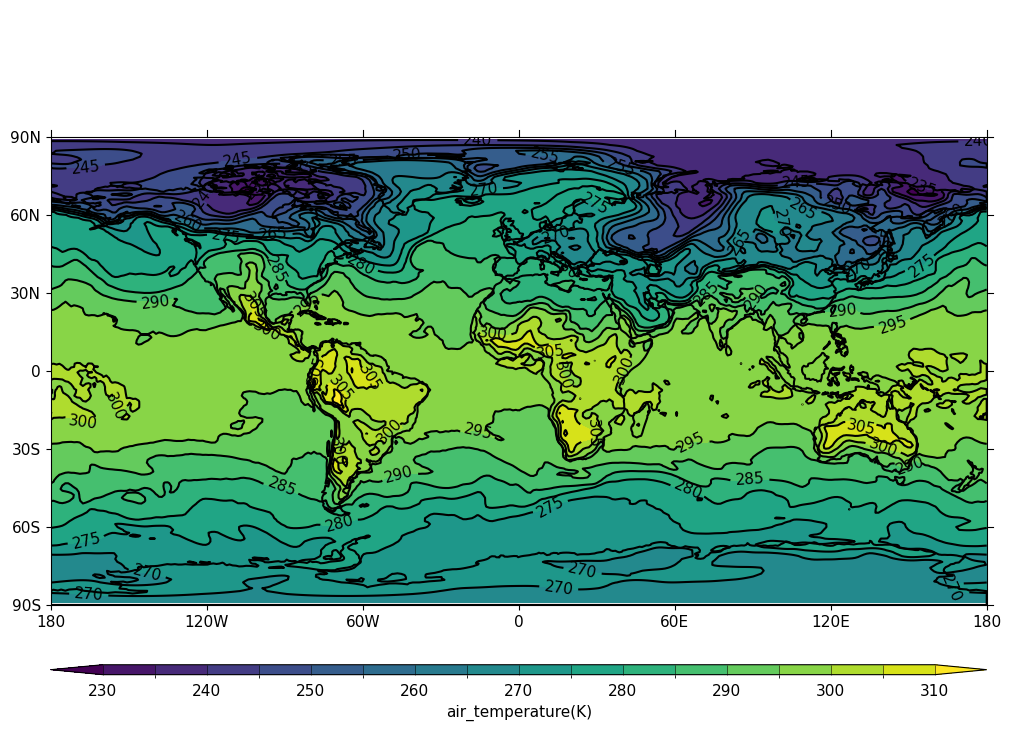

In [8]:
cfp.con(temp_field.subspace(pressure=1000.0))

Let's see what the equivalent plot would be for the subspace over a different pressure, this time the lowest 1 mbar:

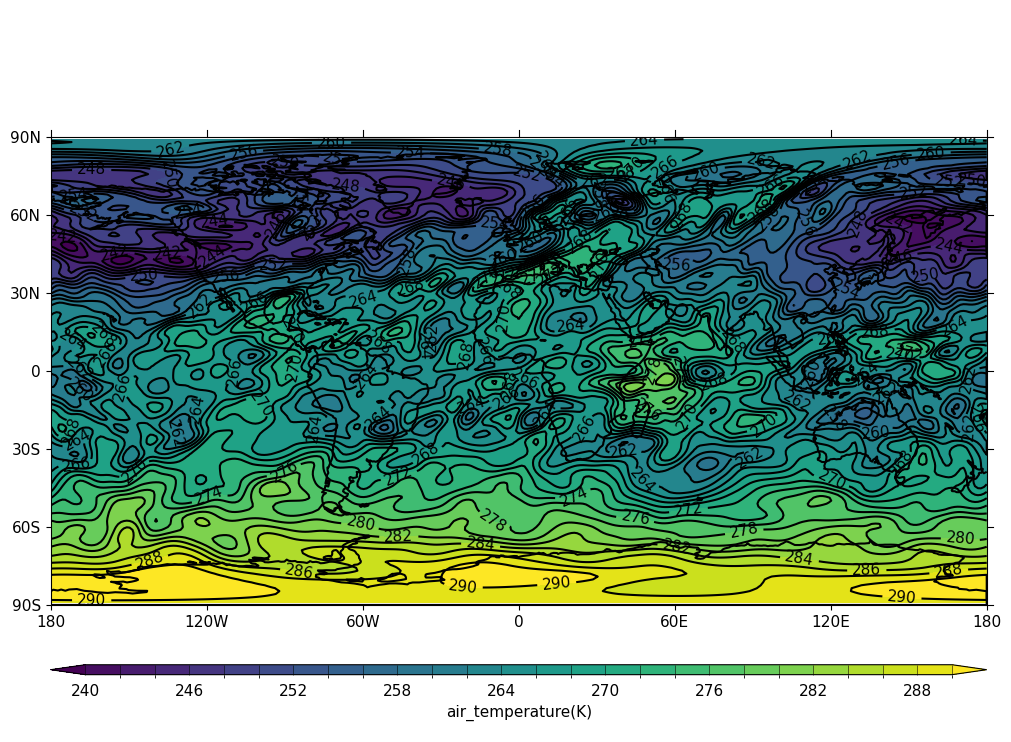

In [9]:
cfp.con(temp_field.subspace(pressure=1.0))

### b) Customising the (contour) plot

cf-plot provides numerous ways to customise a specific plot such as those above. We demonstrate just a small number here.

The second plot from the previous sub-section, in particular, has contour lines which are so dense they obscure the world map and data pattern so let's hide those which you do by specifying `lines=False` to the `con` call:

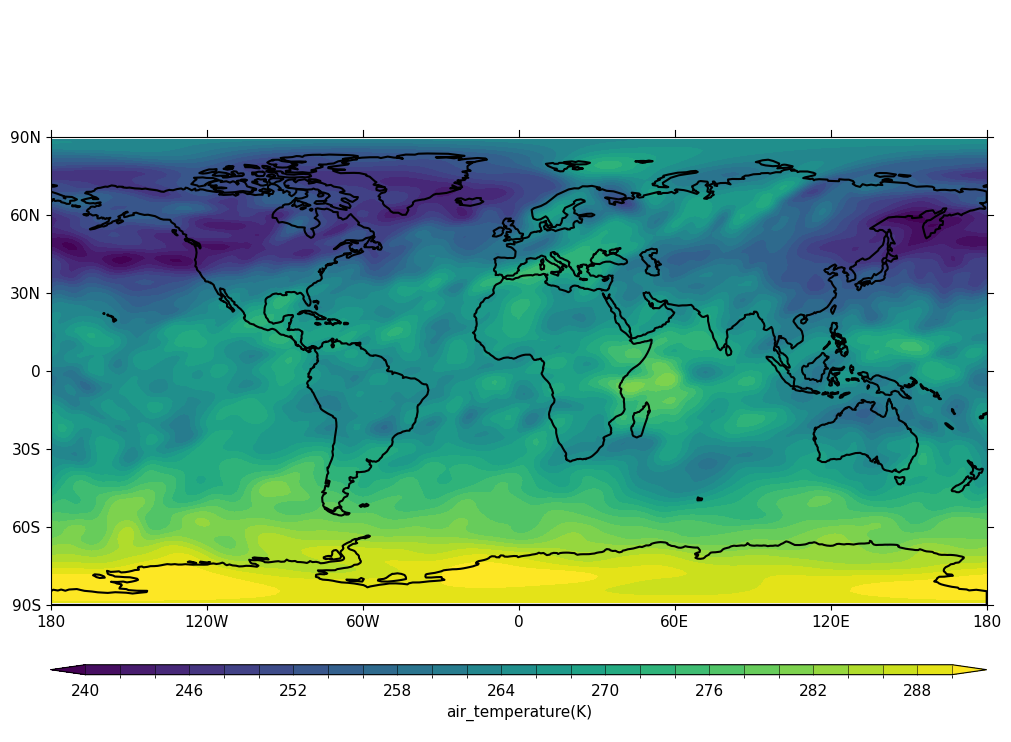

In [10]:
cfp.con(temp_field.subspace(pressure=1.0), lines=False)

Let's also do some further customisation of the plot above, as follows:

- use a different map projection;
- set a different colour map for the data;
- move the colour bar to be vertical not horizontal;
- add a title:

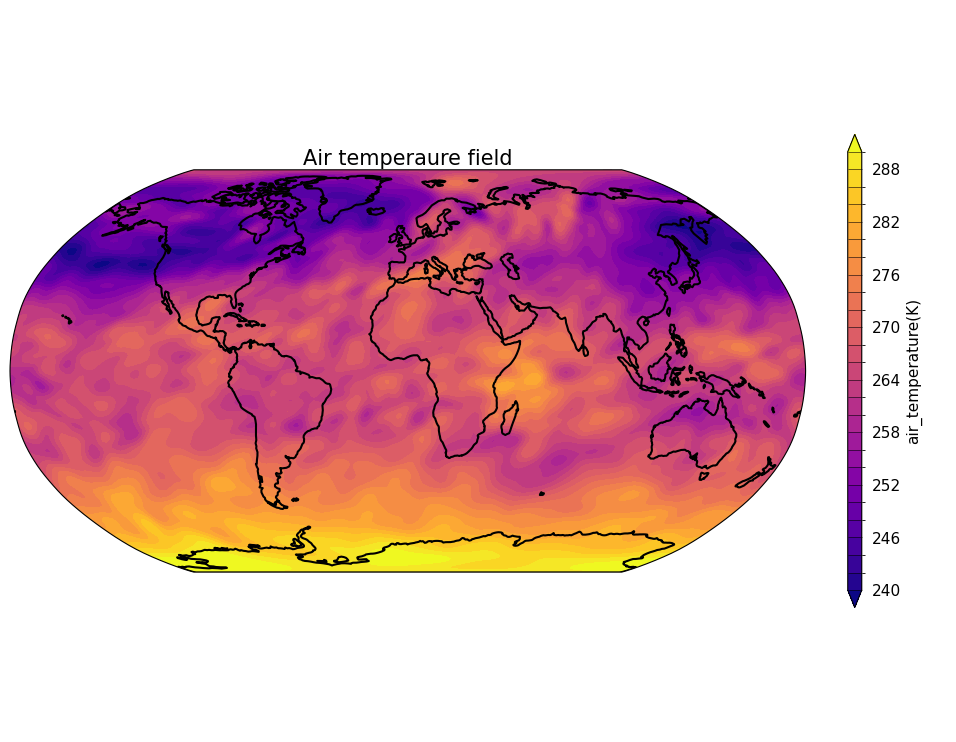

In [11]:
cfp.mapset(proj="robin") # changes the projection
cfp.cscale("plasma")  # changes the colour scale/map
cfp.con(
    temp_field.subspace(pressure=1.0),
    lines=False,
    colorbar_orientation="vertical",  # tells cf-plot to make a vertical colour bar (horizontal is the default)
    title="Air temperaure field"  # adds the specified title
)

We might want to view a smaller section of the data, say over Australia only. We can do this in two ways:

1. by reducing the data further; or
2. by specifying to cf-plot to only show a smaller window on the data.

For (1), instead of a subspace on just pressure, we also suspace on X and Y i.e. longitude and latitude, to reduce those axes. We can use `cf.wi` which specifies a 'within' condition. First, define the extrema of both of these we want to view, for example these are those longitudes and latitudes which provide a view centered around Australia:

In [12]:
cfp.mapset() # resets the projection
lonmin = 110
lonmax = 155
latmin = -45
latmax = -5

Now do method (1) from above, via a subspace on three axes, pressure (as before) as well as longitude and latitude (new). Note we could do each subspace via a separate call, but they can also be done together in one call like so:

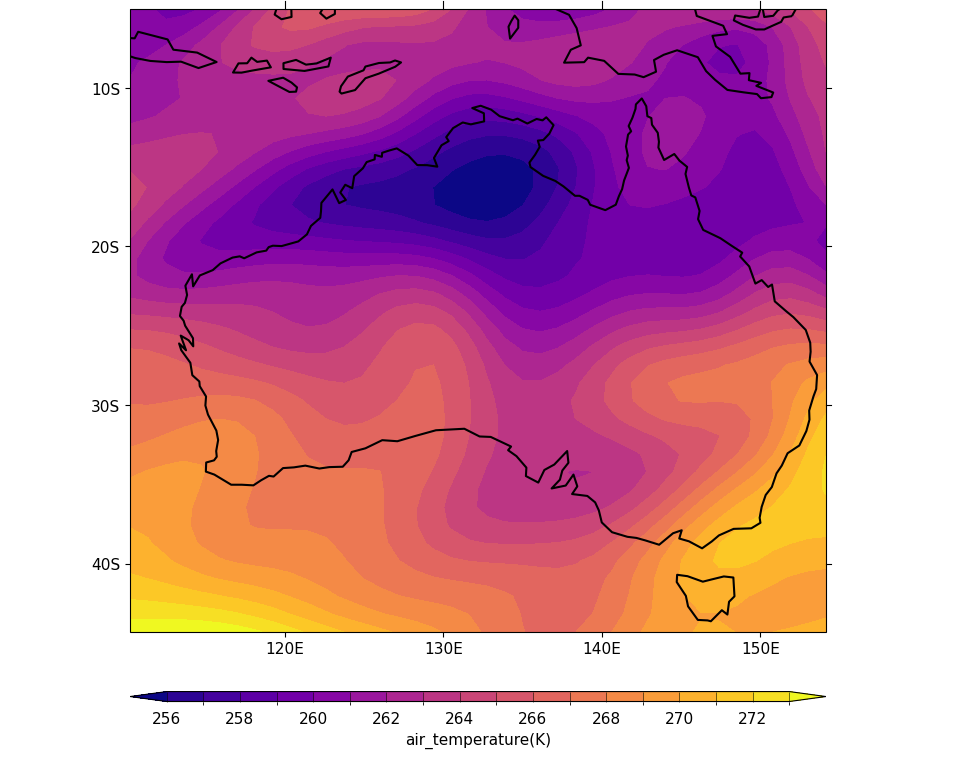

In [13]:
# Do further subspacing to reduce the latitude and longitude with cf-python
fsub_all = temp_field.subspace(
    pressure=1.0,
    longitude=cf.wi(lonmin, lonmax),
    latitude=cf.wi(latmin, latmax)
)

# Plot the above
cfp.con(fsub_all, lines=False)

Method (2) can be achieved by setting the keyword arguments to the cf-plot `mapset` method like so:

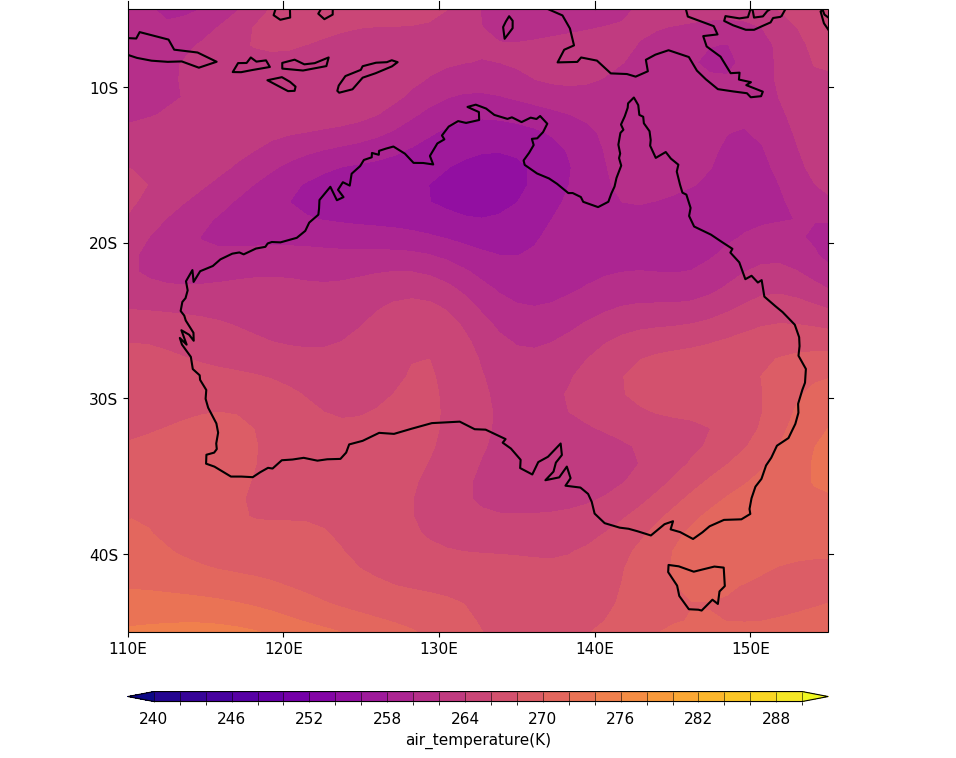

In [14]:
cfp.mapset(lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax)
cfp.con(temp_field.subspace(pressure=1.0), lines=False)

Note the differences in colour shades between the two plots from the different approaches are because in approach (2) cf-plot normalises the colour map extent of the data to only account for the area shown.

### c) Making a vector plot with basic customisation

Finally let's make some vector plots. Notice our final two fields from the read-in fieldlist are in eastward and northward components, therefore can be combined into vectors from these vector components:

In [15]:
print(wind_u_field)
print(wind_v_field)

Field: eastward_wind (ncvar%U)
------------------------------
Data            : eastward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east
Field: northward_wind (ncvar%V)
-------------------------------
Data            : northward_wind(time(1), pressure(23), latitude(160), longitude(320)) m s**-1
Dimension coords: time(1) = [1964-01-21 00:00:00]
                : pressure(23) = [1000.0, ..., 1.0] mbar
                : latitude(160) = [89.14151763916016, ..., -89.14151763916016] degrees_north
                : longitude(320) = [0.0, ..., 358.875] degrees_east


Again we need to subspace in pressure so that we have an effective 2D not 4D space that can be visualised as a contour plot.
This time let's take our subspace at 500 mbar pressure:

In [16]:
u = wind_u_field.subspace(pressure=500.0)
v = wind_v_field.subspace(pressure=500.0)

To make a vector plot using cf-plot, use the `vect` function:

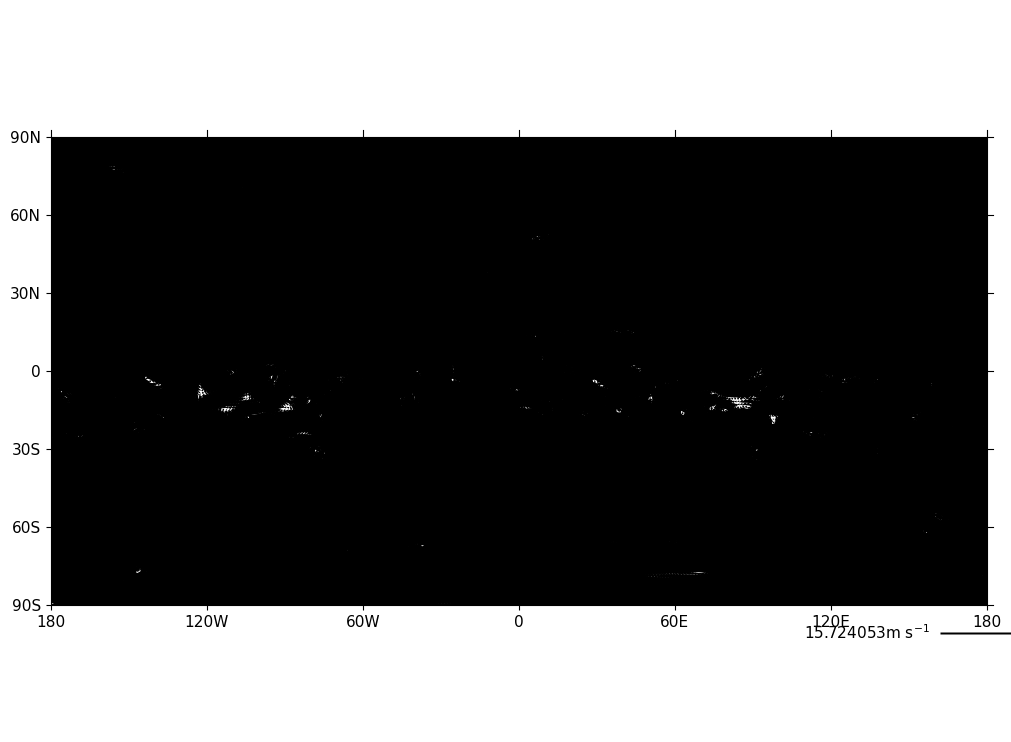

In [17]:
cfp.mapset()  # reset the mapping settings, including map projection
cfp.vect(u=u, v=v)

We can mostly just see black here! This is expected and because we need to customise the vector spacing. There are clearly too many vectors shown they overwhelm the plot area, so use the `scale` and `stride` keyword arguments to `vect` to edit the size and spacing of the vector arrows respectively:

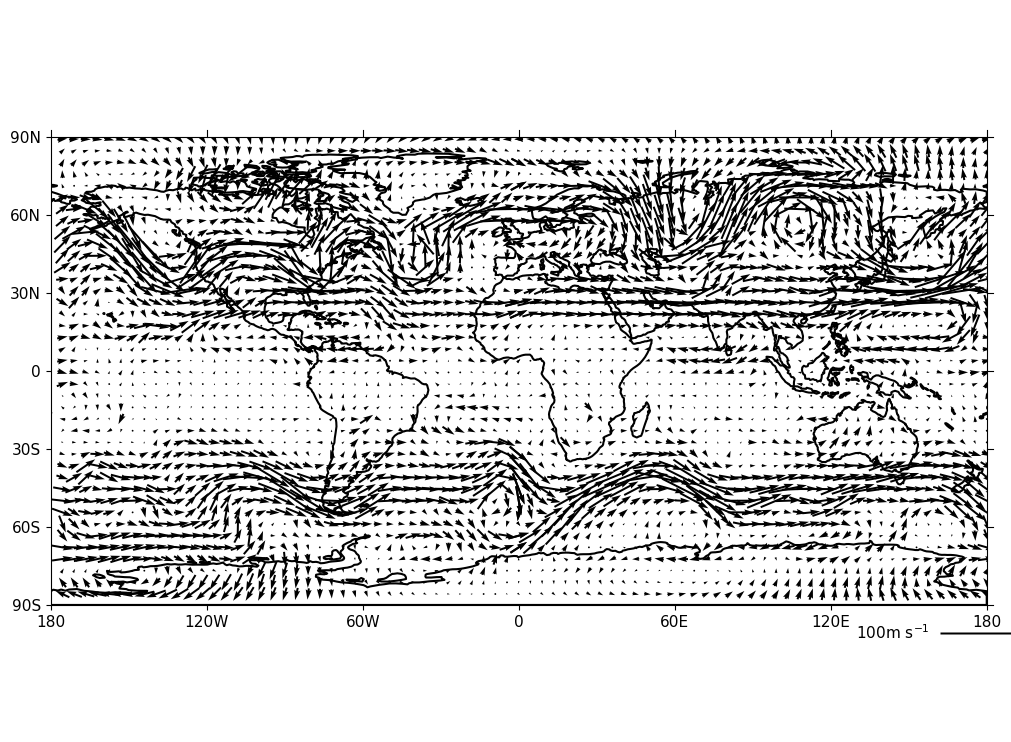

In [18]:
cfp.vect(u=u, v=v, scale=100, stride=4)  # much better - found these values after playing around with values

Like for contour plotting, we can focus in on specific areas of the data in space via the two methods covered there. In the vector plot case, note we may need to adjust the vector spacing and size again for optimal viewing.

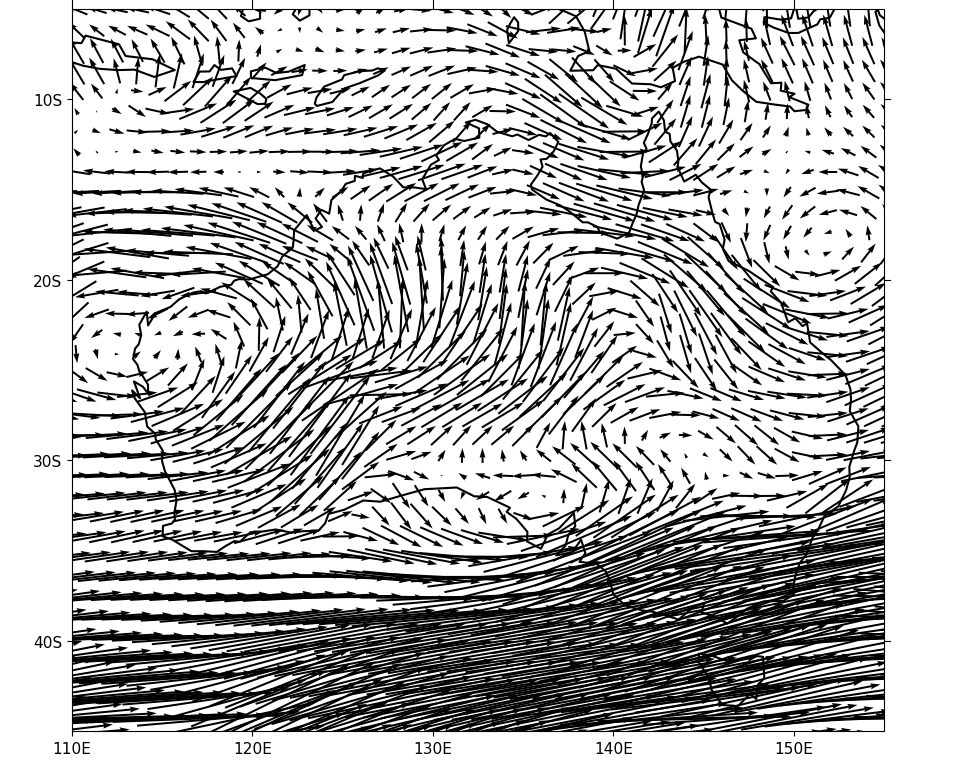

In [19]:
cfp.mapset(lonmin=lonmin, lonmax=lonmax, latmin=latmin, latmax=latmax) # also resets the projection to the default 'cyl'
cfp.vect(u=u, v=v)

Trial and error for vector size and spacing gives a nicer result for the above plot with:

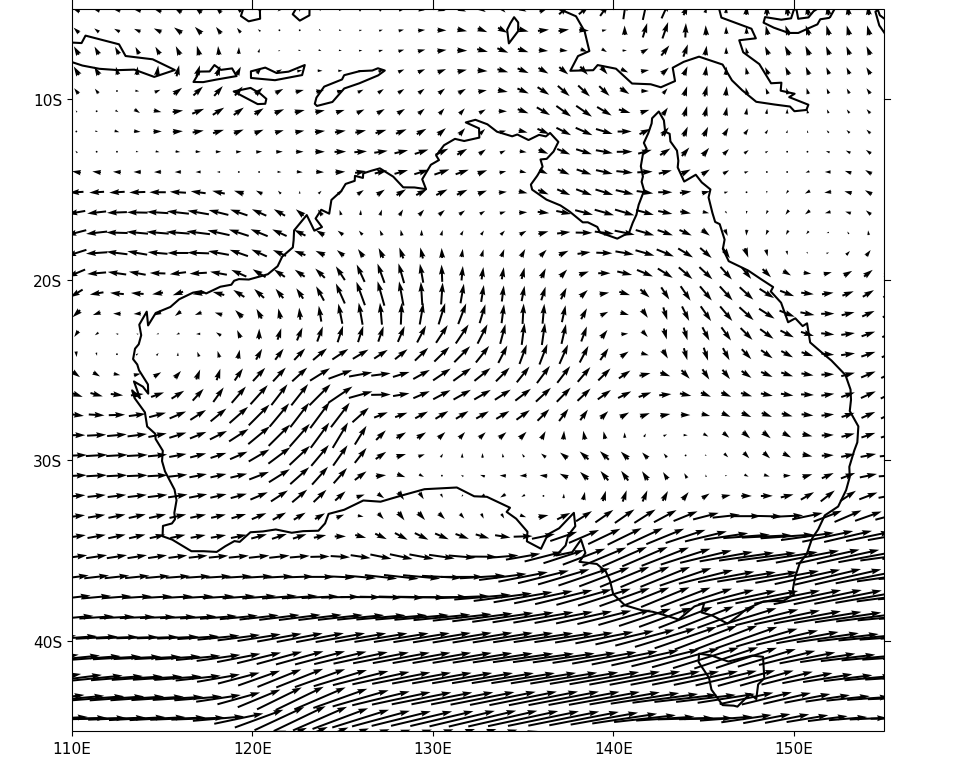

In [20]:
cfp.vect(u=u, v=v, scale=50, stride=1)  # better than the above!

***

***

## Where to find more information and resources on the NCAS CF Data Tools

Here are some links relating to the NCAS CF Data Tools and this training.

* This training, with further material, is hosted online and there are instructions for setting up the environment so you can work through it in your own time: https://github.com/NCAS-CMS/cf-tools-training.
* The cf-python documentation lives at https://ncas-cms.github.io/cf-python/.
* The cf-python code lives on GitHub at https://github.com/NCAS-CMS/cf-python. There is an Issue Tracker to report queries or questions at https://github.com/NCAS-CMS/cf-python/issues.
* The cf-plot documentation lives at https://ncas-cms.github.io/cf-plot/build/.
* The cf-plot code lives on GitHub at https://github.com/NCAS-CMS/cf-plot. There is an Issue Tracker to report queries or questions at https://github.com/NCAS-CMS/cf-plot/issues.
* There is a technical presentation about the NCAS CF Data Tools avaialble from https://hps.vi4io.org/_media/events/2020/summer-school-cfnetcdf.pdf.
* The website of the CF Conventions can be found at https://cfconventions.org/.
* The landing page for training into the CF Conventions is found here within the website above: https://cfconventions.org/Training/.

If you have any queries after this course, please either use the Issue Trackers linked above or you can email me at: sadie.bartholomew@ncas.ac.uk.

***